Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
import graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import os

In [2]:
df=pd.read_csv("black_friday.csv")

In [3]:
#Randomly Select Rows in Pandas
df = df.sample(n=300000, random_state=43)

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
273731,1000166,P00003042,M,18-25,4,B,1,1,8,NaN,NaN,7848
206530,1001836,P00279642,M,26-35,0,A,4+,0,7,NaN,NaN,20736
271860,1005886,P00358742,M,26-35,20,A,2,0,5,NaN,NaN,8674
170162,1002215,P00057442,F,26-35,0,B,2,1,5,14.0,16.0,5406
412155,1003474,P00067842,M,36-45,11,C,4+,1,6,10.0,16.0,16096


In [5]:
df.shape

(300000, 12)

In [6]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.describe().astype('int64')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,300000,300000,300000,300000,205265,90852,300000
mean,1003027,8,0,5,9,12,9253
std,1727,6,0,3,5,4,5024
min,1000001,0,0,1,2,3,12
25%,1001516,2,0,1,5,9,5686
50%,1003072,7,0,5,9,14,8045
75%,1004477,14,1,8,15,16,12048
max,1006040,20,1,20,18,18,23961


In [8]:
def remove_outlier(data):
    anomalies = []
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    print("Lower Fence limit:",(fence_low))
    print("Upper Fence limit:",(fence_high))
    # Generate outliers
    for outlier in data:
        if outlier > fence_high or outlier < fence_low:
            anomalies.append(outlier)
    print("total number of outliers:", (len(anomalies)))
    return anomalies

In [9]:
remove_outlier(df['Purchase'])

Lower Fence limit: -3857.0
Upper Fence limit: 21591.0
total number of outliers: 1281


[23609,
 23723,
 23338,
 23847,
 23103,
 23648,
 23170,
 23380,
 23936,
 23204,
 23513,
 23163,
 23305,
 23596,
 23558,
 23556,
 23374,
 23340,
 23241,
 23747,
 23823,
 23596,
 23273,
 23523,
 23029,
 22730,
 23857,
 23911,
 23653,
 23402,
 23772,
 23523,
 23587,
 23119,
 23082,
 23598,
 23394,
 23758,
 23668,
 22710,
 23636,
 23554,
 23533,
 23546,
 23103,
 23142,
 23952,
 23565,
 23042,
 23160,
 23722,
 23944,
 23201,
 23760,
 23106,
 23470,
 23123,
 23154,
 23648,
 23659,
 23124,
 23854,
 23478,
 23652,
 23541,
 23555,
 23607,
 23143,
 23523,
 23076,
 23338,
 23362,
 23804,
 23132,
 23473,
 23056,
 23462,
 23631,
 23584,
 23802,
 23199,
 23768,
 23940,
 23410,
 23426,
 23060,
 23243,
 23167,
 23087,
 23798,
 23429,
 23252,
 23722,
 23237,
 23371,
 23841,
 23425,
 23482,
 23080,
 23601,
 23239,
 23460,
 23101,
 23535,
 23948,
 23313,
 23895,
 23743,
 23637,
 23278,
 23756,
 23094,
 23567,
 23891,
 23386,
 23748,
 23389,
 23758,
 23521,
 23776,
 23277,
 23586,
 23386,
 23448,
 23885,


In [10]:
df=df[(df['Purchase']<21626.375)]

In [11]:
#checking unique values
df.nunique()

User_ID                        5891
Product_ID                     3540
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      16131
dtype: int64

In [12]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df[df.duplicated(keep='first')]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [User_ID, Product_ID, Gender, Age, Occupation, City_Category, Stay_In_Current_City_Years, Marital_Status, Product_Category_1, Product_Category_2, Product_Category_3, Purchase]
Index: []


In [13]:
df.shape

(298719, 12)

In [14]:
df.isnull().sum().sort_values(ascending=False)

Product_Category_3            208215
Product_Category_2             94616
Purchase                           0
Product_Category_1                 0
Marital_Status                     0
Stay_In_Current_City_Years         0
City_Category                      0
Occupation                         0
Age                                0
Gender                             0
Product_ID                         0
User_ID                            0
dtype: int64

In [15]:
#lets drop 'Product_Category_3' as 70,000 data is missing and also drop 'User_ID','Product_ID'
#del df['User_ID']
#del df['Product_ID']
del df['Product_Category_3']

In [16]:
#Mean and median so we can take any one of them, lets go with the median
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].median())

Rechecking NaN values


In [17]:
df.isnull().sum().sort_values(ascending=False)

Purchase                      0
Product_Category_2            0
Product_Category_1            0
Marital_Status                0
Stay_In_Current_City_Years    0
City_Category                 0
Occupation                    0
Age                           0
Gender                        0
Product_ID                    0
User_ID                       0
dtype: int64

Visualization

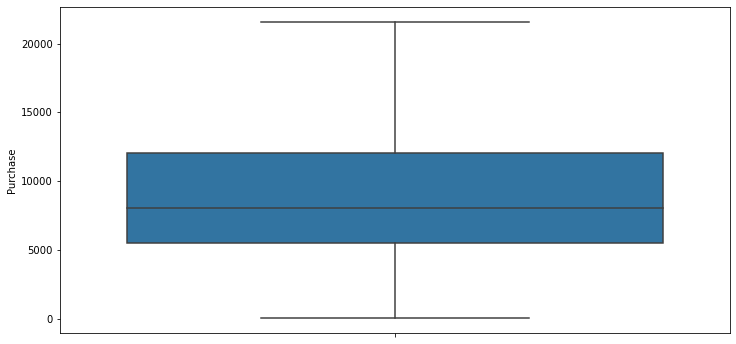

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(y=df['Purchase'])

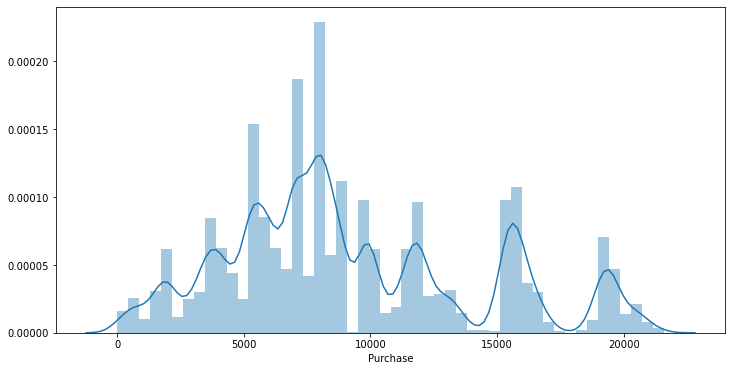

In [19]:
#We can see there is a pattern or segments of high peaks
plt.figure(figsize=(12,6))
sns.distplot(df['Purchase'])
plt.show()

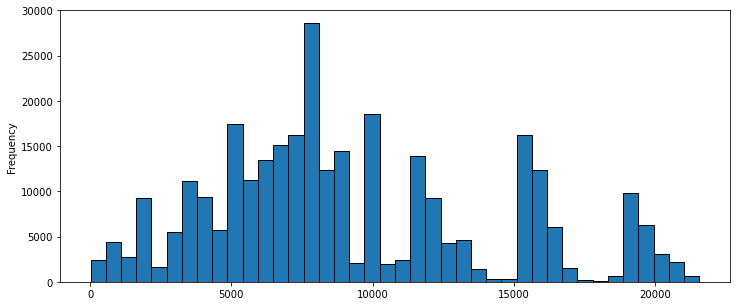

In [20]:
df['Purchase'].plot.hist(bins=40, edgecolor='k',figsize=(12,5))

# OCCUPATION effect on purchase

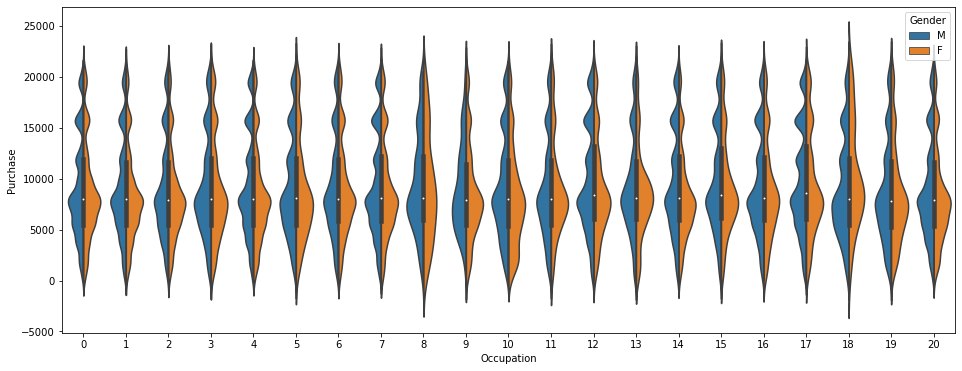

In [21]:
# df.boxplot('Purchase', by='Occupation', figsize=(14,4))
plt.figure(figsize=(16,6))
sns.violinplot(x='Occupation', y='Purchase', hue='Gender', split=True, data=df)

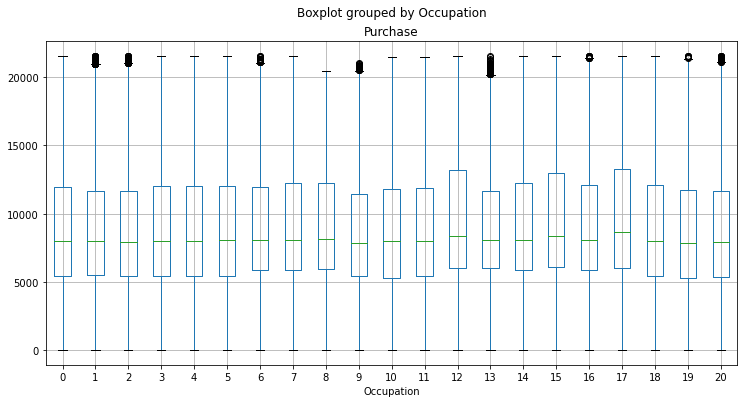

In [22]:
#There is not much variance in occupation
df.boxplot('Purchase', by='Occupation', figsize=(12,6))

In [23]:
#Relationship between Gender and purchase pattern
df[['Occupation', 'Purchase']].groupby(['Occupation'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Occupation,Purchase
17,17,9766.165099
12,12,9742.877899
15,15,9666.701829
8,8,9444.347879
14,14,9395.359730
7,7,9340.182311
16,16,9313.156906
5,5,9270.417541
6,6,9191.478108
13,13,9190.406258


# Gender effect on purchase

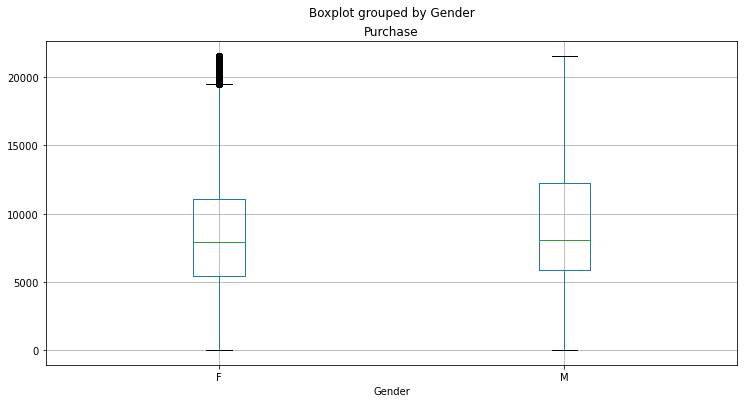

In [24]:
# sns.countplot(df['Gender'])
#There are very less Females compared to male
df.boxplot('Purchase', by='Gender', figsize=(12,6))

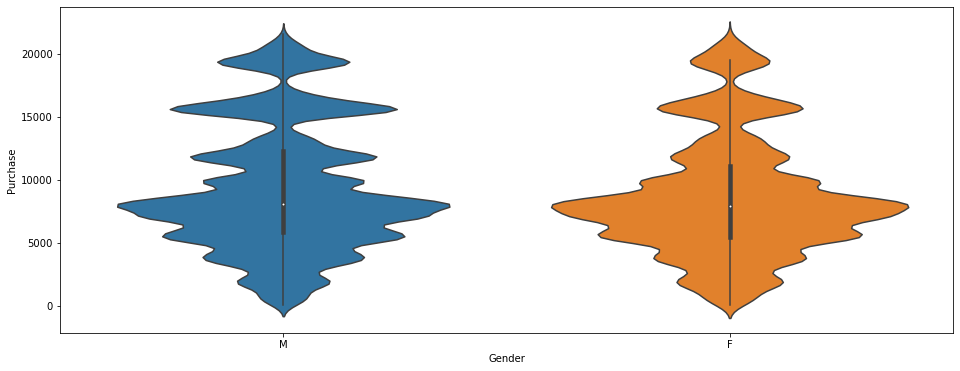

In [25]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Gender', y='Purchase', split=True, data=df)

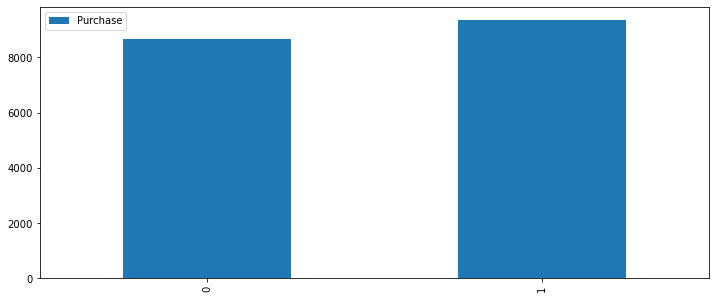

In [26]:
#Gender doesnot have much effect on purhase pattern but there are more outliers for female
df[['Gender', 'Purchase']].groupby(['Gender'], as_index=False).mean().plot.bar(figsize=(12,5));

# Age effect on purchase

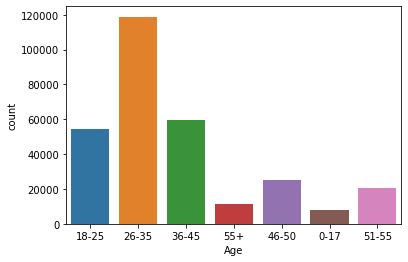

In [27]:
#There are 7 difffrent categores of age group nad age group between 26-35 purchases a lot
sns.countplot(df['Age'])

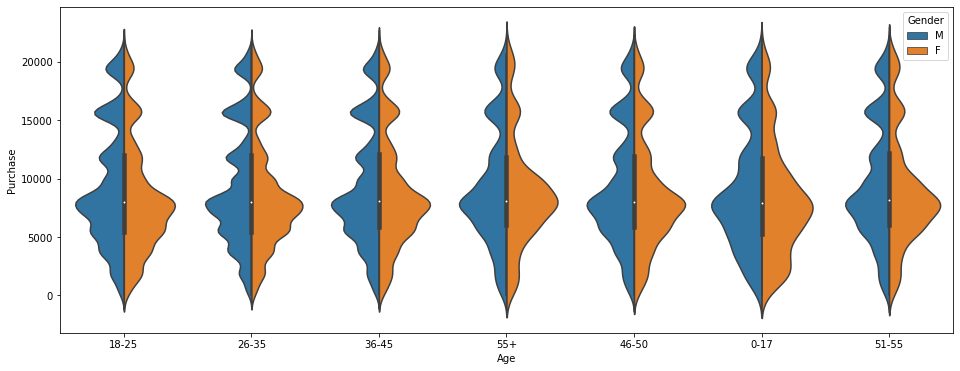

In [28]:
plt.figure(figsize=(16,6))
sns.violinplot(x='Age', y='Purchase',hue='Gender', split=True, data=df)


In [29]:
#Relationship between Gender and purchase pattern, Age has almost no effect on purchase pattern
df[['Age', 'Purchase']].groupby(['Age'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Age,Purchase
5,51-55,9443.352517
3,36-45,9256.215113
6,55+,9193.893782
2,26-35,9186.438593
4,46-50,9146.752460
1,18-25,9123.287771
0,0-17,8789.234813


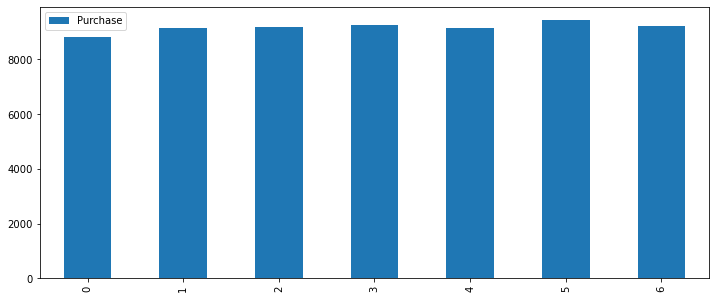

In [30]:
df[['Age', 'Purchase']].groupby(['Age'], as_index=False).mean().plot.bar(figsize=(12,5));

# City_Category effect on purchase

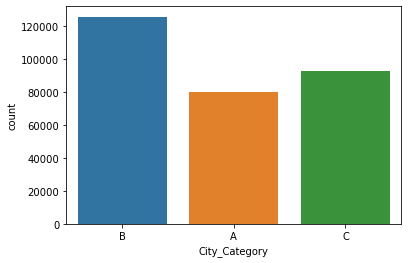

In [31]:
sns.countplot(df['City_Category'])
#B category has highest shoppers

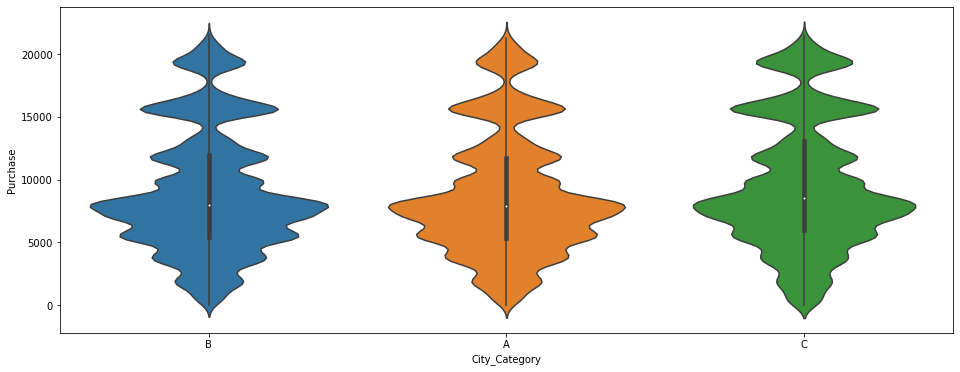

In [32]:
plt.figure(figsize=(16,6))
sns.violinplot(x='City_Category', y='Purchase', split=True, data=df)

In [33]:
#Relationship between City_Category and purchase pattern, There is no relationship between them city categories and Purchase
df[['City_Category', 'Purchase']].groupby(['City_Category'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,City_Category,Purchase
2,C,9644.070795
1,B,9082.856900
0,A,8841.131855


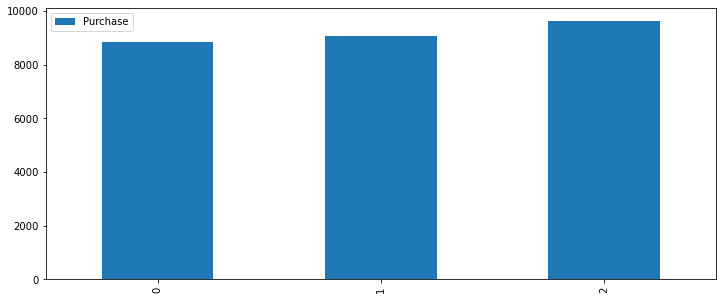

In [34]:
df[['City_Category', 'Purchase']].groupby(['City_Category'], as_index=False).mean().plot.bar(figsize=(12,5));

# Stay_In_Current_City_Years effect on purchase

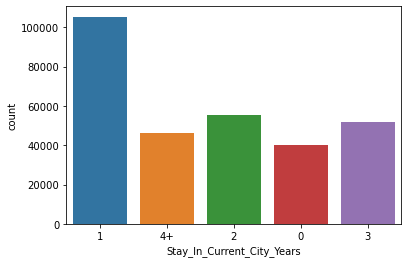

In [35]:
sns.countplot(df['Stay_In_Current_City_Years'])
#People staying in same city for 1 year purchases a lot

In [36]:
#Relationship between Stay_In_Current_City_Years and purchase pattern
df[['Stay_In_Current_City_Years', 'Purchase']].groupby(['Stay_In_Current_City_Years'], as_index=False).mean().sort_values(by='Purchase', ascending=False)
#average purchase is very close

,Stay_In_Current_City_Years,Purchase
2,2,9251.562618
3,3,9221.243423
4,4+,9219.605882
1,1,9156.122794
0,0,9141.166282


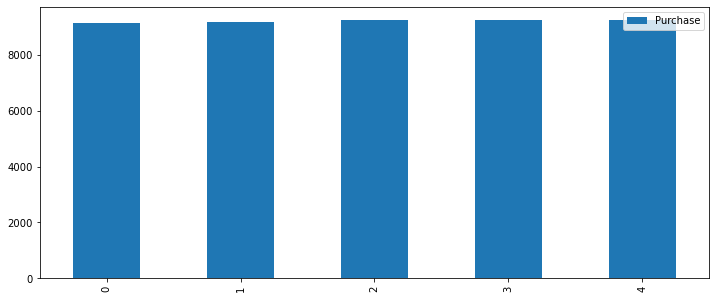

In [37]:
df[['Stay_In_Current_City_Years', 'Purchase']].groupby(['Stay_In_Current_City_Years'], as_index=False).mean().plot.bar(figsize=(12,5));

# Marital_Status effect on purchase

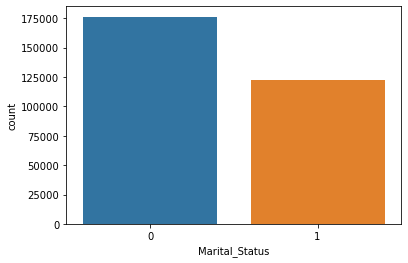

In [38]:
sns.countplot(df['Marital_Status'])
#Count of people who are not married  is high

In [39]:
#Relationship between Stay_In_Current_City_Years and purchase pattern
df[['Marital_Status', 'Purchase']].groupby(['Marital_Status'], as_index=False).mean().sort_values(by='Purchase', ascending=False)
#average puchasing amount is same for married and unmarried people

,Marital_Status,Purchase
1,1,9195.688479
0,0,9190.871222


# Product_Category_1 effect on purchase

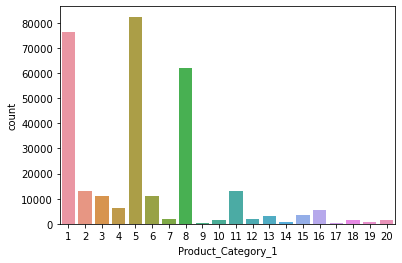

In [40]:
sns.countplot(df['Product_Category_1'])
#sales of Product_Category_1 [1,5,8] is very high

In [41]:
df[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1'], as_index=False).agg({'Purchase': ['count','mean']})
#.sort_values(by='Purchase', ascending=False)
#average purchasing amount is very high for product Category 10,7,6,9,15,16
#data[["YearsAtCompany", "Attrition"]].groupby(['YearsAtCompany'], as_index=False).agg({'Attrition': ['count','mean']})

Product_Category_1 Purchase              
                         count          mean
0                   1    76366  13600.640796
1                   2    12956  11253.734795
2                   3    11092  10081.324648
3                   4     6464   2324.632890
4                   5    82400   6236.263095
5                   6    11120  15828.891727
6                   7     1981  16394.399293
7                   8    62167   7495.977866
8                   9      176  13930.880682
9                  10     1540  16610.453896
10                 11    13229   4679.569355
11                 12     2124   1351.252825
12                 13     3082    724.288774
13                 14      840  13040.770238
14                 15     3506  14878.687963
15                 16     5356  14830.501120
16                 17      318  10091.537736
17                 18     1713   2965.545826
18                 19      858     36.391608
19                 20     1431    364.907757

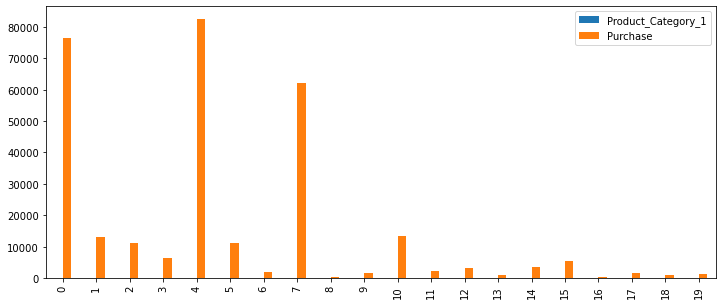

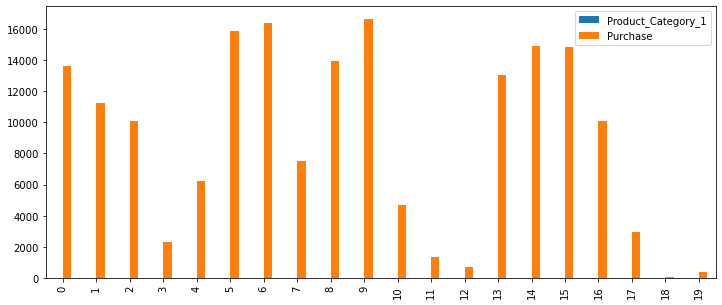

In [42]:
df[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1'], as_index=False).count().plot.bar(figsize=(12,5));
df[['Product_Category_1', 'Purchase']].groupby(['Product_Category_1'], as_index=False).mean().plot.bar(figsize=(12,5));
#purchase for category 9,5,6,8,13,14,15 is very high

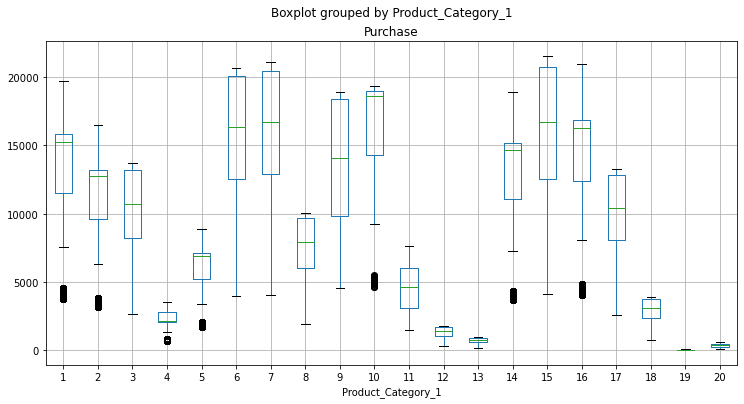

In [43]:
df.boxplot('Purchase', by='Product_Category_1', figsize=(12,6))
#Thre is too much variation in 'Product_Category_1'

# Product_Category_2 effect on purchase

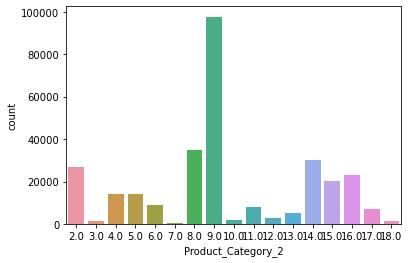

In [44]:
sns.countplot(df['Product_Category_2'])
#count of Product_Category_2 0(genereated by us),8,2, is very high

In [45]:
df[['Product_Category_2', 'Purchase']].groupby(['Product_Category_2'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Product_Category_2,Purchase
8,10.0,15531.349091
0,2.0,13590.604866
4,6.0,11507.962330
1,3.0,11233.941656
6,8.0,10274.360829
2,4.0,10201.450858
14,16.0,10162.478767
13,15.0,10091.794179
15,17.0,9424.811913
16,18.0,9348.328581


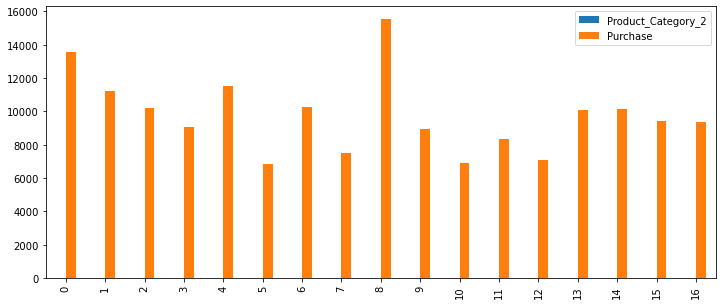

In [46]:
df[['Product_Category_2', 'Purchase']].groupby(['Product_Category_2'], as_index=False).mean().plot.bar(figsize=(12,5));
#purchase for category 10,2 is very high

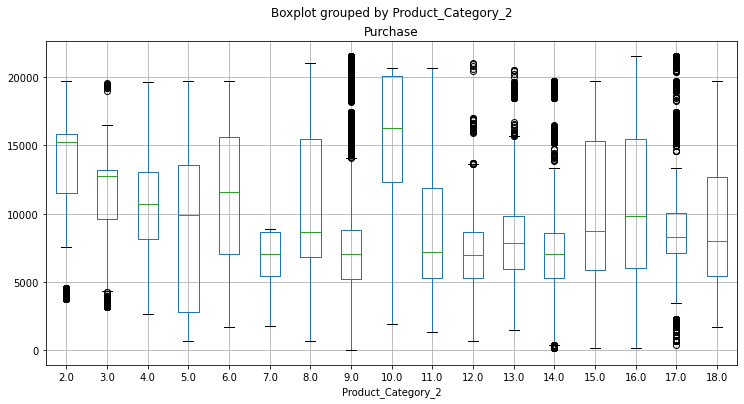

In [47]:
df.boxplot('Purchase', by='Product_Category_2', figsize=(12,6))
#There is some variation in 'Product_Category_2'

# Checking userID relations

In [48]:
df[['User_ID', 'Purchase']].groupby(['User_ID'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,User_ID,Purchase
1307,1001349,18781.428571
2301,1002369,18461.000000
3801,1003902,18219.108696
576,1000592,17947.500000
3367,1003461,17874.666667
5042,1005171,17676.500000
4844,1004968,17649.250000
98,1000101,17542.767442
837,1000863,17522.444444
5844,1005994,16994.640000


In [49]:
df.groupby(['User_ID'], as_index=False).mean().sort_values(by='User_ID', ascending=False)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
5890,1006040,6.0,0.0,5.883721,10.209302,9217.023256
5889,1006039,0.0,1.0,5.632653,9.306122,7726.061224
5888,1006038,1.0,0.0,4.600000,8.200000,7970.800000
5887,1006037,1.0,0.0,7.666667,10.869565,8955.492754
5886,1006036,15.0,1.0,5.942238,9.671480,7820.635379
5885,1006035,1.0,0.0,5.476744,10.372093,6510.639535
5884,1006034,14.0,0.0,9.000000,9.500000,12843.750000
5883,1006033,13.0,1.0,3.562500,9.187500,13999.875000
5882,1006032,7.0,0.0,7.178571,9.821429,8972.142857
5881,1006031,0.0,0.0,5.666667,8.380952,9677.142857


# Checking Product_ID relations

In [50]:
df[['Product_ID', 'Purchase']].groupby(['Product_ID'], as_index=False).mean().sort_values(by='Purchase', ascending=False)

,Product_ID,Purchase
2542,P00272342,20889.000000
1479,P00162142,20859.000000
701,P00074542,20323.000000
2876,P00308042,19206.000000
673,P00071442,18961.849624
2905,P00311242,18958.428571
2865,P00306742,18844.500000
2677,P00286342,18755.391304
3215,P00343842,18737.000000
2941,P00315142,18468.000000


# Scatterplot of target as well as independent variable

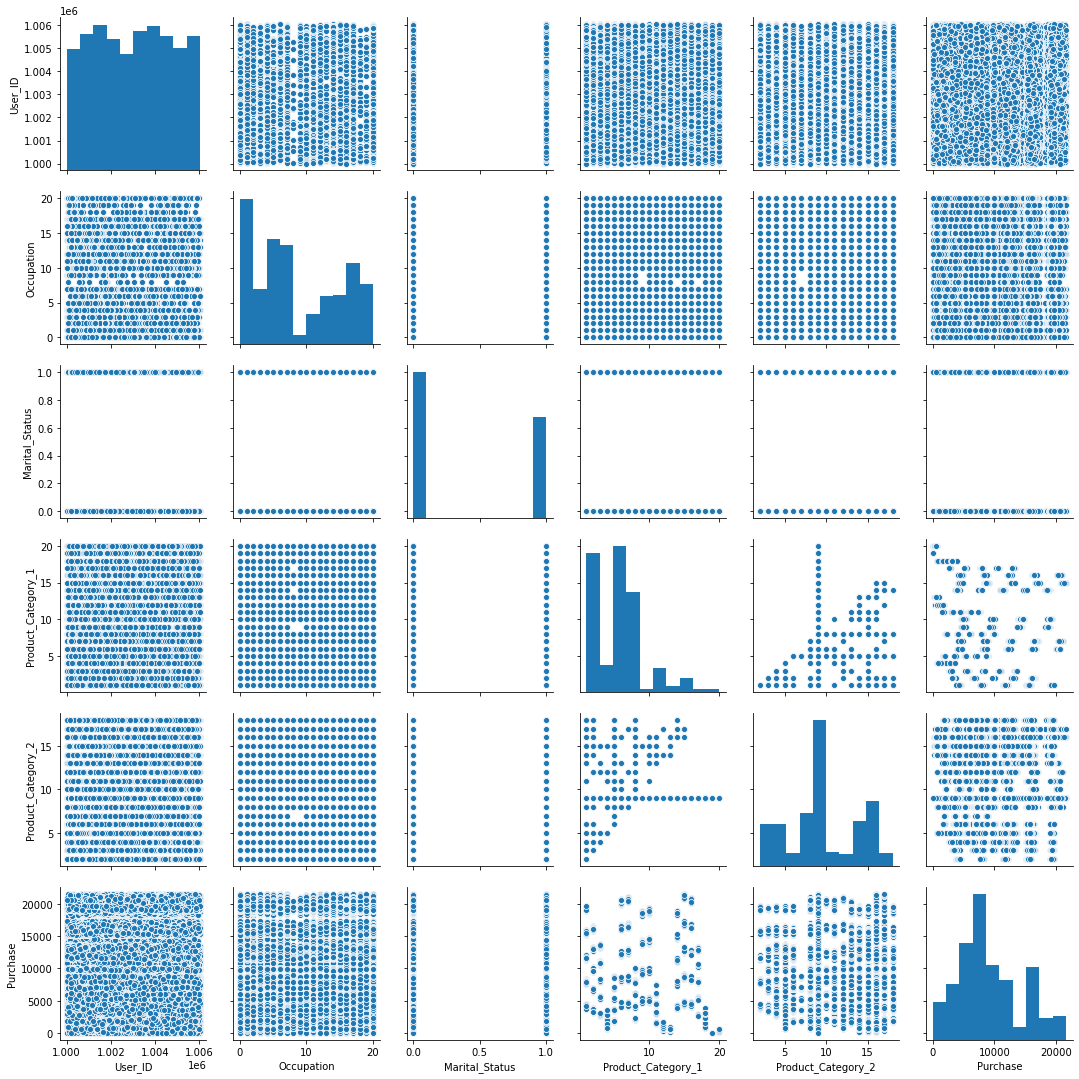

In [51]:
sns.pairplot(df)
plt.show()

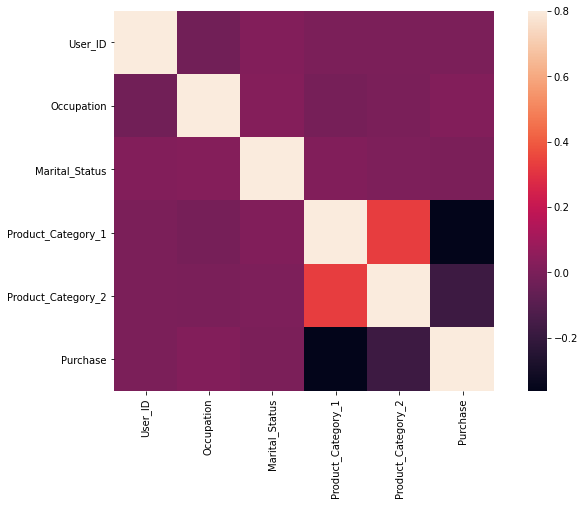

In [52]:
# Correlation Matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

In [53]:
#Correlation of data
df = pd.DataFrame(df)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1,-0.023,0.02,0.0035,0.00055,0.0026
Occupation,-0.023,1,0.026,-0.0092,5.3e-05,0.021
Marital_Status,0.02,0.026,1,0.017,0.0092,0.00048
Product_Category_1,0.0035,-0.0092,0.017,1,0.33,-0.36
Product_Category_2,0.00055,5.3e-05,0.0092,0.33,1,-0.17
Purchase,0.0026,0.021,0.00048,-0.36,-0.17,1


# segragating target and dependent variable and dropping the columns carrying less information

In [54]:
X = df[['Age', 'Product_Category_1']]
y = df['Purchase']

In [55]:
X.head()

,Age,Product_Category_1
273731,18-25,8
206530,26-35,7
271860,26-35,5
170162,26-35,5
412155,36-45,6


In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [57]:
X_enc = X.apply(LabelEncoder().fit_transform) 

In [58]:
X_check_multicollin= X_enc.iloc[:]
calc_vif(X_check_multicollin)

,variables,VIF
0,Age,1.83108
1,Product_Category_1,1.83108


In [59]:
X.describe()

,Product_Category_1
count,298719.000000
mean,5.391682
std,3.938243
min,1.000000
25%,1.000000
50%,5.000000
75%,8.000000
max,20.000000


# mapping Age

In [60]:
cleanup_nums = {"Age" : {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7},
                "Stay_In_Current_City_Years":{'0':0,'1':1,'2':2,'3':3,'4+':4}}

In [61]:
cleanup_nums

{'Age': {'0-17': 1,
  '18-25': 2,
  '26-35': 3,
  '36-45': 4,
  '46-50': 5,
  '51-55': 6,
  '55+': 7},
 'Stay_In_Current_City_Years': {'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4}}

In [62]:
X.replace(cleanup_nums, inplace=True)

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


# Performing one hot encoding 

In [63]:
X_dummy=pd.get_dummies(X, columns=["Product_Category_1"])

In [64]:
X_dummy.head()

,Age,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
273731,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
206530,3,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
271860,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
170162,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
412155,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#X_enc = X.apply(LabelEncoder().fit_transform) 

In [66]:
#X_check_multicollin= X_enc.iloc[:]
#calc_vif(X_check_multicollin)

In [67]:
X_dummy.columns

Index(['Age', 'Product_Category_1_1', 'Product_Category_1_2',
       'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5',
       'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8',
       'Product_Category_1_9', 'Product_Category_1_10',
       'Product_Category_1_11', 'Product_Category_1_12',
       'Product_Category_1_13', 'Product_Category_1_14',
       'Product_Category_1_15', 'Product_Category_1_16',
       'Product_Category_1_17', 'Product_Category_1_18',
       'Product_Category_1_19', 'Product_Category_1_20'],
      dtype='object')

# Dropping the columns to avoid dummy variable

In [68]:
del X_dummy['Product_Category_1_1']
#del X_dummy['Product_Category_2_2.0']

In [69]:
X_dummy.columns

Index(['Age', 'Product_Category_1_2', 'Product_Category_1_3',
       'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6',
       'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9',
       'Product_Category_1_10', 'Product_Category_1_11',
       'Product_Category_1_12', 'Product_Category_1_13',
       'Product_Category_1_14', 'Product_Category_1_15',
       'Product_Category_1_16', 'Product_Category_1_17',
       'Product_Category_1_18', 'Product_Category_1_19',
       'Product_Category_1_20'],
      dtype='object')

#Performing standardization

# Train Test split

In [70]:
X_train, X_test, y_train, y_test = train_test_split( X_dummy, y, test_size=0.3, random_state=100)

(array([13067., 19262., 33541., 50643., 25789., 20930.,  4571., 25269.,
         7547.,  8484.]),
 array([1.20000e+01, 2.16750e+03, 4.32300e+03, 6.47850e+03, 8.63400e+03,
        1.07895e+04, 1.29450e+04, 1.51005e+04, 1.72560e+04, 1.94115e+04,
        2.15670e+04]),
 <a list of 10 Patch objects>)

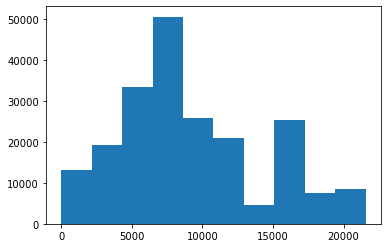

In [71]:
plt.hist(y_train)

In [72]:
X_train.describe()

,Age,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
count,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000,209103.000000
mean,3.494321,0.043400,0.037116,0.021755,0.276098,0.036829,0.006652,0.208189,0.000598,0.005074,0.044088,0.007020,0.010196,0.002779,0.011721,0.018202,0.001038,0.005892,0.002783,0.004830
std,1.351637,0.203756,0.189046,0.145882,0.447067,0.188342,0.081290,0.406014,0.024443,0.071052,0.205292,0.083494,0.100459,0.052639,0.107630,0.133680,0.032198,0.076532,0.052684,0.069331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
X_train.head()

,Age,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
172444,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3317,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
365019,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512371,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29100,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
X_train.shape

(209103, 20)

In [75]:
y_train.shape

(209103,)

In [76]:
X_test.head()

,Age,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
436078,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243584,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229846,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70000,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
133041,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Performing Standardization

In [77]:
X_train[['Age']] = StandardScaler().fit_transform(X_train[['Age']])

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [78]:
X_test[['Age']] = StandardScaler().fit_transform(X_test[['Age']])

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [79]:
X_test.head()

,Age,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
436078,0.371190,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
243584,-0.365583,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229846,-1.102357,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70000,0.371190,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
133041,1.844738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
X_train.head()

,Age,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
172444,-0.365721,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3317,-1.105567,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
365019,-1.105567,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
512371,0.374124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29100,-0.365721,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Checking R2 

In [81]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. We need to add it ourselves
# Remember, we want to predict the price based off our features.
# X represents our predictor variables, and y our predicted variable.
# We need now to add manually the intercepts
X_endog = sm.add_constant(X_train)

C:\Users\A691602\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [82]:
res = sm.OLS(y_train, X_endog)
res.fit()

In [83]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                 1.778e+04
Date:                Thu, 18 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:54:18   Log-Likelihood:            -1.9717e+06
No. Observations:              209103   AIC:                         3.943e+06
Df Residuals:                  209082   BIC:                         3.944e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.362e+04     13.029   1045.506      0.000    1.36e+04    1.36e+04
Age                     140.8311      6.619     21.278      0.000     127.859     153.804
Product_Category_1_2  -2359.7309     34.196    -69.005      0.000   -2426.755   -2292.707
Product_Category_1_3  -3542.3501     36.601    -96.784      0.000   -3614.086   -3470.614
Product_Category_1_4  -1.128e+04     46.518   -242.578      0.000   -1.14e+04   -1.12e+04
Product_Category_1_5  -7383.1230     18.077   -408.432      0.000   -7418.553   -7347.693
Product_Category_1_6   2164.2821     36.712     58.953      0.000    2092.328    2236.237
Product_Category_1_7   2803.8110     81.804     34.275      0.000    2643.476    2964.146
Product_Category_1_8  -6144.0348     19.477   -315.457      0.000   -6182.208   -6105.861
Product_Category_1_9    384.6740    269.703      1.426      0.154    -143.936     913.284
Product_Category_1_10  2990.2062     93.395     32.017      0.000    2807.154    3173.259
Product_Category_1_11 -8935.5203     33.965   -263.082      0.000   -9002.091   -8868.950
Product_Category_1_12 -1.233e+04     79.732   -154.591      0.000   -1.25e+04   -1.22e+04
Product_Category_1_13 -1.292e+04     66.535   -194.243      0.000   -1.31e+04   -1.28e+04
Product_Category_1_14  -551.1214    125.637     -4.387      0.000    -797.367    -304.876
Product_Category_1_15  1255.8197     62.223     20.183      0.000    1133.865    1377.774
Product_Category_1_16  1223.3047     50.529     24.210      0.000    1124.268    1322.341
Product_Category_1_17 -3635.0484    204.926    -17.738      0.000   -4036.698   -3233.399
Product_Category_1_18  -1.07e+04     86.846   -123.215      0.000   -1.09e+04   -1.05e+04
Product_Category_1_19  -1.36e+04    125.527   -108.350      0.000   -1.38e+04   -1.34e+04
Product_Category_1_20 -1.328e+04     95.668   -138.788      0.000   -1.35e+04   -1.31e+04
==============================================================================
Omnibus:                    16841.909   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26088.540
Skew:                          -0.631   Prob(JB):                         0.00
Kurtosis:                       4.184   Cond. No.                         43.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Applying Linear regression model

In [84]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [85]:
regressor.intercept_

13622.222470995019

In [86]:
regressor.coef_.mean()

-4785.05479378471

In [87]:
regressor.coef_.max()

2990.20618063241

In [88]:
regressor.coef_.min()

-13600.888859963925

In [89]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [90]:
y_pred[:5]

array([ 6291.37458195, 15735.01903026,  9924.62619922, 13674.49761125,
       13882.01888387])

In [91]:
print('MAE :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE : 2280.3406674273383
MSE : 9024682.821016116
RMSE : 3004.110986800607


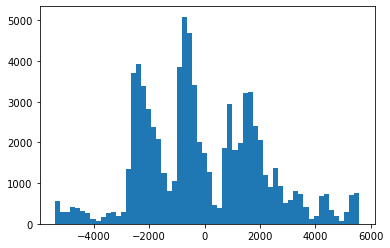

4.673060347230731 Mean error
2280.3406674274397 Mean absolute error


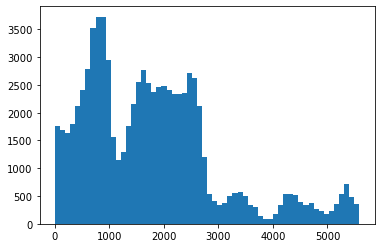

In [92]:
error = (y_pred - y_test)
error_idx = (error < np.quantile(error, 0.95)) & (error > np.quantile(error, 0.05))
_ = plt.hist(error[error_idx], bins=60)
plt.show()

_ = plt.hist(np.abs(error[error_idx]), bins=60)

print(np.mean(error), 'Mean error')
print(np.mean(np.abs(error)), 'Mean absolute error')
#print(np.median(np.abs(error)), 'Medan absolute error')

In [93]:
abs(error).median()

1803.8249302970544

In [94]:
abs(error).mean()

2280.3406674274397

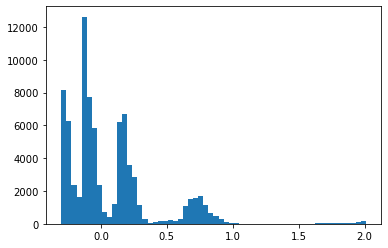

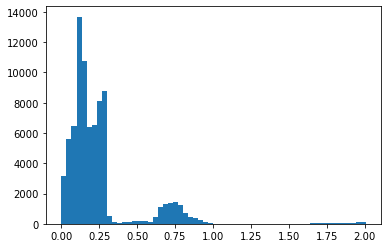

In [95]:
error = (y_pred - y_test)/ y_test
error_idx = (error < np.quantile(error, 0.95)) & (error > np.quantile(error, 0.05))
_ = plt.hist(error[error_idx], bins=60)
plt.show()

_ = plt.hist(np.abs(error[error_idx]), bins=60)

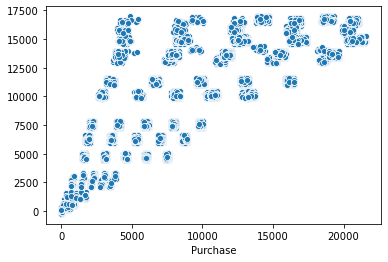

In [97]:
sns.scatterplot(y_test,y_pred )

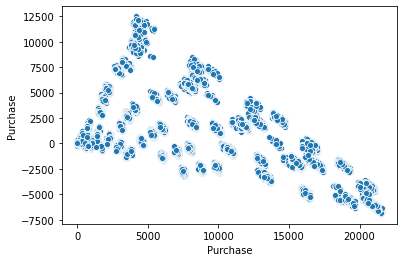

In [98]:
sns.scatterplot(y_test,(y_pred - y_test))

In [99]:
y_pred[y_pred < 0] = 0

(array([ 5623.,  8241., 14292., 21638., 11181.,  9007.,  2022., 10840.,
         3145.,  3627.]),
 array([1.20000e+01, 2.16770e+03, 4.32340e+03, 6.47910e+03, 8.63480e+03,
        1.07905e+04, 1.29462e+04, 1.51019e+04, 1.72576e+04, 1.94133e+04,
        2.15690e+04]),
 <a list of 10 Patch objects>)

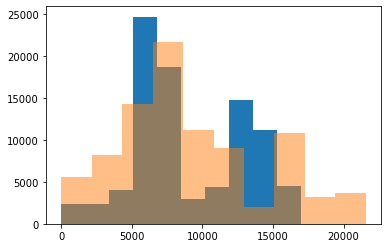

In [100]:
plt.hist(y_pred)
plt.hist(y_test, alpha=0.5)

In [101]:
y_pred.max()

16975.985700812107

#  Fitting to the decision tree to the dataset

In [102]:
Decision_Tree_regressor = DecisionTreeRegressor(random_state = 0)
Decision_Tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [103]:
# Predicting the Test set results
y_Decision_Tree_regressor_pred = Decision_Tree_regressor.predict(X_test)

In [104]:
print('MAE Decision tree:', metrics.mean_absolute_error(y_test, y_Decision_Tree_regressor_pred))
print('MSE Decision tree:', metrics.mean_squared_error(y_test, y_Decision_Tree_regressor_pred))
print('RMSE Decision tree:', np.sqrt(metrics.mean_squared_error(y_test, y_Decision_Tree_regressor_pred)))

MAE Decision tree: 2276.4052722906467
MSE Decision tree: 9016035.15721761
RMSE Decision tree: 3002.6713368628293


In [105]:
#plotting graph

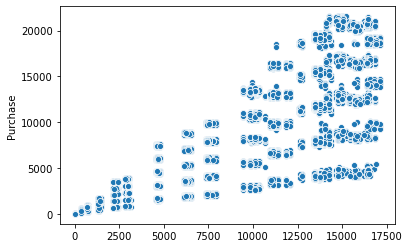

In [106]:
sns.scatterplot(y_Decision_Tree_regressor_pred, y_test)

In [107]:
abs(y_Decision_Tree_regressor_pred - y_test).median()

1797.5975537938848

In [108]:
abs(y_Decision_Tree_regressor_pred - y_test).mean()

2276.4052722904426

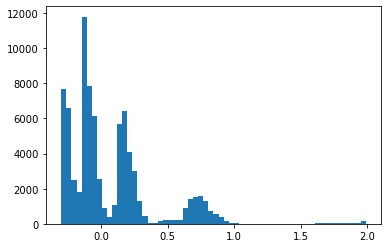

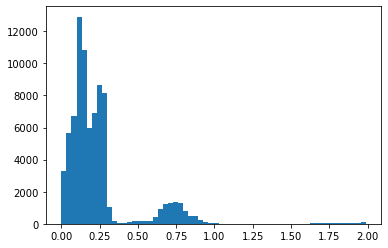

In [141]:
error = (y_Decision_Tree_regressor_pred - y_test)/ y_test
error_idx = (error < np.quantile(error, 0.95)) & (error > np.quantile(error, 0.05))
_ = plt.hist(error[error_idx], bins=60)
plt.show()

_ = plt.hist(np.abs(error[error_idx]), bins=60)

(array([ 5623.,  8241., 14292., 21638., 11181.,  9007.,  2022., 10840.,
         3145.,  3627.]),
 array([1.20000e+01, 2.16770e+03, 4.32340e+03, 6.47910e+03, 8.63480e+03,
        1.07905e+04, 1.29462e+04, 1.51019e+04, 1.72576e+04, 1.94133e+04,
        2.15690e+04]),
 <a list of 10 Patch objects>)

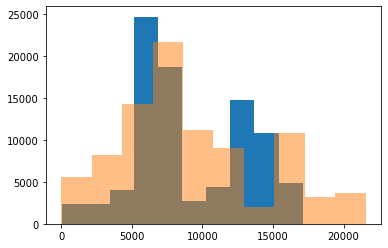

In [144]:
plt.hist(y_Decision_Tree_regressor_pred)
plt.hist(y_test, alpha=0.5)

In [142]:
error.mean()

0.16011972181253548

In [110]:
y_Decision_Tree_regressor_pred [y_Decision_Tree_regressor_pred  < 0] = 0

In [111]:
Decision_Tree_regressor.feature_importances_.astype('float')

array([2.29789165e-03, 1.93036284e-02, 2.96946438e-02, 1.41096208e-01,
       2.16284877e-01, 8.10532662e-03, 2.98558815e-03, 1.51224332e-01,
       2.24849981e-05, 2.74737169e-03, 1.43733607e-01, 6.10381116e-02,
       9.47915900e-02, 7.82049642e-05, 1.21914547e-03, 1.57769624e-03,
       8.34129808e-04, 4.02040073e-02, 3.19950636e-02, 5.07660916e-02])

In [112]:
os.environ["PATH"] += os.pathsep + 'C:\\Users\\A691602\\Desktop\\Python\\my example\\graphviz-2.38\\release\\bin'
dot_data = tree.export_graphviz(Decision_Tree_regressor, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

# Fitting Random Forest Regression to the dataset

In [113]:
# Fitting Random Forest Regression to the dataset
Random_Forest_Regressor_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
Random_Forest_Regressor_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [114]:
Random_Forest_Regressor_regressor_pred = Random_Forest_Regressor_regressor.predict(X_test)

In [115]:
print('MAE Decision tree:', metrics.mean_absolute_error(y_test, Random_Forest_Regressor_regressor_pred))
print('MSE Decision tree:', metrics.mean_squared_error(y_test, Random_Forest_Regressor_regressor_pred))
print('RMSE Decision tree:', np.sqrt(metrics.mean_squared_error(y_test, Random_Forest_Regressor_regressor_pred)))

MAE Decision tree: 2276.615529575262
MSE Decision tree: 9016497.17383671
RMSE Decision tree: 3002.7482701413232


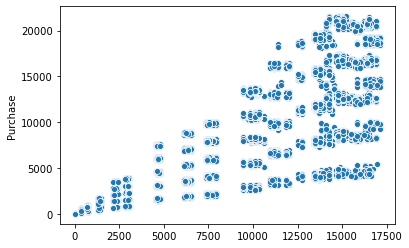

In [116]:
sns.scatterplot(Random_Forest_Regressor_regressor_pred, y_test)

In [117]:
abs(Random_Forest_Regressor_regressor_pred).mean()

9197.476409169492

In [118]:
error = (Random_Forest_Regressor_regressor_pred - y_test)

In [119]:
abs(Random_Forest_Regressor_regressor_pred - y_test).median()

1797.8220961016332

In [120]:
(abs(Random_Forest_Regressor_regressor_pred - y_test)).mean()

2276.615529575253

(array([ 5623.,  8241., 14292., 21638., 11181.,  9007.,  2022., 10840.,
         3145.,  3627.]),
 array([1.20000e+01, 2.16770e+03, 4.32340e+03, 6.47910e+03, 8.63480e+03,
        1.07905e+04, 1.29462e+04, 1.51019e+04, 1.72576e+04, 1.94133e+04,
        2.15690e+04]),
 <a list of 10 Patch objects>)

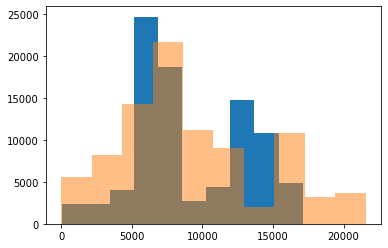

In [145]:
plt.hist(Random_Forest_Regressor_regressor_pred)
plt.hist(y_test, alpha=0.5)

# using SVR

In [126]:
regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_train, y_train)

SVR()

In [127]:
# Predicting the Test set results
y_regressor_svr_pred = regressor_svr.predict(X_test)

In [128]:
print('MAE Decision tree:', metrics.mean_absolute_error(y_test,y_regressor_svr_pred))
print('MSE Decision tree:', metrics.mean_squared_error(y_test, y_regressor_svr_pred))
print('RMSE Decision tree:', np.sqrt(metrics.mean_squared_error(y_test, y_regressor_svr_pred)))

MAE Decision tree: 2881.317103545491
MSE Decision tree: 15117185.062762858
RMSE Decision tree: 3888.082440324904


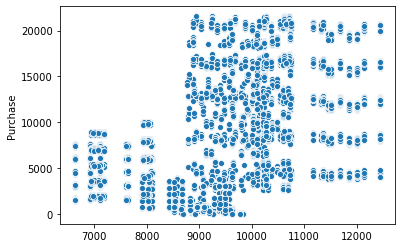

In [129]:
sns.scatterplot(y_regressor_svr_pred, y_test)

In [133]:
abs(y_regressor_svr_pred - y_test).median()

1971.0971333347898

In [135]:
abs(y_regressor_svr_pred - y_test).mean()

2881.317103545569

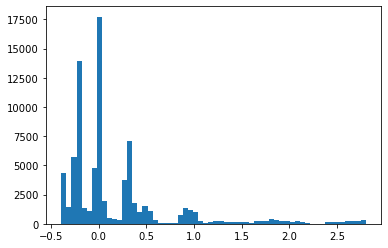

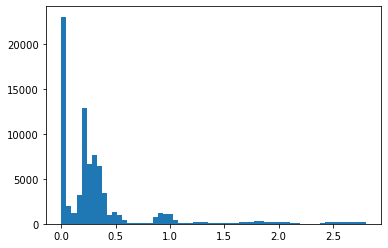

In [138]:
error = (y_regressor_svr_pred - y_test)/ y_test
error_idx = (error < np.quantile(error, 0.95)) & (error > np.quantile(error, 0.05))
_ = plt.hist(error[error_idx], bins=60)
plt.show()

_ = plt.hist(np.abs(error[error_idx]), bins=60)

In [140]:
error.mean()

1.6245414182383442

(array([ 5623.,  8241., 14292., 21638., 11181.,  9007.,  2022., 10840.,
         3145.,  3627.]),
 array([1.20000e+01, 2.16770e+03, 4.32340e+03, 6.47910e+03, 8.63480e+03,
        1.07905e+04, 1.29462e+04, 1.51019e+04, 1.72576e+04, 1.94133e+04,
        2.15690e+04]),
 <a list of 10 Patch objects>)

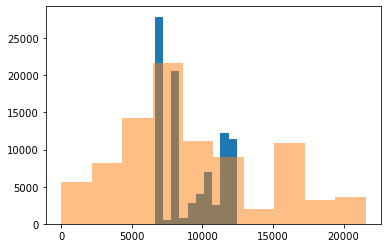

In [143]:
plt.hist(y_regressor_svr_pred)
plt.hist(y_test, alpha=0.5)